# ORIE 4580/5580/5581 Assignment 5


#### Students: Sean Benko (snb55) Sean Hansen (seh92)

References:
Grinstead and Snell, ChatGPT


### Github link: [example Github link] https://github.com/snb55/Simulation-Projects


### Instructions


* Due Friday, October 13, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).




---
---


# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

___
## Ans.
$\lambda = 28.8$

We have 10 tagged birds out of the whole poluation.
We've seen 6 tagged out of a rate of lambda.

Thus we solve for b
$\lambda\frac{10}{b}=6$

Thus, the answer is $28.8\cdot 10 / 6 = 48$

___

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

___


We know this is a hypergeometric distribution.

From Grinstead and Snell we denote:

$$h(N,k,n,x)=\frac{{k\choose x}{{N-k}\choose{n-x}}}{{N}\choose{k}}
=\frac{{10\choose4}{{N-10}\choose{20-4}}}{{N}\choose{20}}$$

To Find the MLE we will use python to iterate and find the N that maximizes the fraction above.



In [1]:
import numpy as np

# Define the parameters
k = 10
n = 20
x = 4

results = []

for N in range(26, 10000):
    result = np.math.comb(k, x) * np.math.comb(N-k, n - x) / np.math.comb(N, n)
    results.append(result)
,
max_index = np.argmax(results)
max_N = max_index + 26  # Adjust the index to get the actual N value
print("Optimal N:", max_N)


Optimal N: 49


___
___

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

___

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?
___


The probability mass function of the random variable $N$ is given by
\begin{align*}
f_N(N) =
\begin{cases}
(1-p)^yp &\mbox{ if $y<40$,}\\
(1-p)^{40} &\mbox{ if $y=40$,} \\
0 & \mbox{otherwise}.
\end{cases}
\end{align*}

Note: We found the middle case by using the compliment: $1-\Sigma_{k=0}^{39}P(N=k)=(1-p)^{40}$

## Ans.

___

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.
___

$$L = \prod_1^{100}(1-p)^{y_i}p$$
We can use indicators to express the piecewise:
$$L = (\prod_{I=1}^{100} I(y=40)(1-p)^{40})(\prod_{i=1}^{100}I(y<40)(1-p)^{y_i}p)p$$

Let z = # os y's = 40 
Likelihood Function = $(1-p)^{40z}(1-p)^{y_i}(p^x)$
Let x = # y's < 40
Then we take the log:

$$40x \ln(1-p) + \Sigma_{i=1}^{100}y_i n(1-p)+x\ln(p)$$
Where $y_i < 40$

Then we differentiate w.r.t. p to maximize:

$$\frac{40}{1-p}+\frac{\Sigma_{i=1}^{100}y_i I(y<40)}{1-p}+\frac{x}{p}=0$$

We express:

$$L=p^x(\prod_{i=1}^{n}(1-p)^{y_i}$$

Take log

$$log(L)=x\cdot ln(p) (\Sigma_{i=1}^{n}(1-p)^{y_i})(ln(1-p))$$

Differentiate and set to 0 to find max

$$\frac{x}{p}+\frac{-(\Sigma_{i=1}^n y_i )}{1-p}=$$

x=22
n=100

Thus: By solving:
$$\frac{66}{p}+\frac{-2397}{1-p}=0$$

$$p = 22/281 \approx 0.0268$$

In [2]:
#Anwer Supported by Code:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Read the dataset from CSV file
data = pd.read_csv('Soup_sales_data.csv')

# Extract sales data
sales = data['Y']


# Log-likelihood function
def log_likelihood(p):
    total_log_likelihood = 0
    
    for sale in sales:
        if sale < 40:
            total_log_likelihood += np.log((1 - p) ** sale * p + 1e-10)
        else:
            total_log_likelihood += np.log((1 - p) ** 40 + 1e-10) 
            
    # Return negative log-likelihood (minimize negative log-likelihood to maximize likelihood)
    return -total_log_likelihood

# Find the MLE for p using numerical optimization
initial_guess = 0.5  # Initial guess for p
result = minimize(log_likelihood, initial_guess, bounds=[(0, 1)])

# MLE for p
p_mle = result.x[0]
print("Maximum Likelihood Estimator (MLE) of p:", p_mle)

Maximum Likelihood Estimator (MLE) of p: 0.026796585084110636


___
___

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import scipy.stats as stats

___

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.
___

## Ans.

P(At least two people share)=1-P(No Bday Shared)

P(No Bday Shared) = $\prod_{i=0}^{n-1}\frac{365-i}{365}$

P(At least two people shared) =

$$1-\prod_{i=0}^{n-1}\frac{365-i}{365}
$$

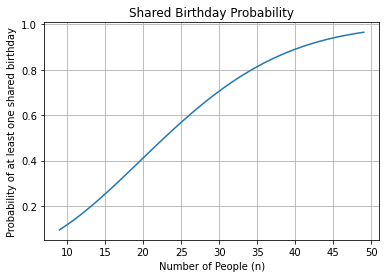

In [32]:
n_values = range(9, 50)
#This will give us the desired inclusive range of 10-50 people corresponding
#to how i is defined in the formula
probabilities = []

for n in n_values:
    prob_no_shared_birthday = 1.0
    for i in range(n):
        prob_no_shared_birthday *= (365 - i) / 365
    prob_shared_birthday = 1 - prob_no_shared_birthday
    probabilities.append(prob_shared_birthday)

plt.plot(n_values, probabilities)
plt.xlabel('Number of People (n)')
plt.ylabel('Probability of at least one shared birthday')
plt.title('Shared Birthday Probability')
plt.grid(True)
plt.show()


___
**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.
___

## Ans.

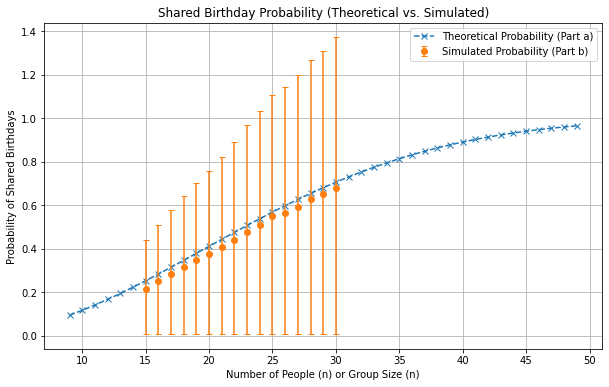

In [53]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n_values_a = range(9, 50)
probabilities_a = []

for n in n_values_a:
    prob_no_shared_birthday = 1.0
    for i in range(n):
        prob_no_shared_birthday *= (365 - i) / 365
    prob_shared_birthday = 1 - prob_no_shared_birthday
    probabilities_a.append(prob_shared_birthday)

num_simulations = 10000
n_values_b = range(14, 30)
simulation_results = []
confidence_intervals = []

def birthday_simulation(n):
    birthdays = [random.randint(1, 365) for _ in range(n)]
    return len(birthdays) != len(set(birthdays))

for n in n_values_b:
    shared_birthdays = sum(birthday_simulation(n) for _ in range(num_simulations))
    probability = shared_birthdays / num_simulations
    
    # Calculate the 95% confidence interval using the binomial proportion confidence interval
    ci_lower, ci_upper = binom.interval(0.95, num_simulations, probability)
    
    simulation_results.append(probability)
    confidence_intervals.append((ci_lower / num_simulations, ci_upper / num_simulations))

    #adjust n values to match formula offset
plotted_n_values=np.array(n_values_b)+1
plt.figure(figsize=(10, 6))
plt.plot(n_values_a, probabilities_a, label='Theoretical Probability (Part a)', linestyle='--', marker='x')
plt.errorbar(plotted_n_values, simulation_results, yerr=np.transpose(np.array(confidence_intervals)), label='Simulated Probability (Part b)', marker='o', linestyle='None', capsize=3)

plt.xlabel('Number of People (n) or Group Size (n)')
plt.ylabel('Probability of Shared Birthdays')
plt.title('Shared Birthday Probability (Theoretical vs. Simulated)')
plt.legend()
plt.grid(True)
plt.show()




---

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)
___

## Ans.

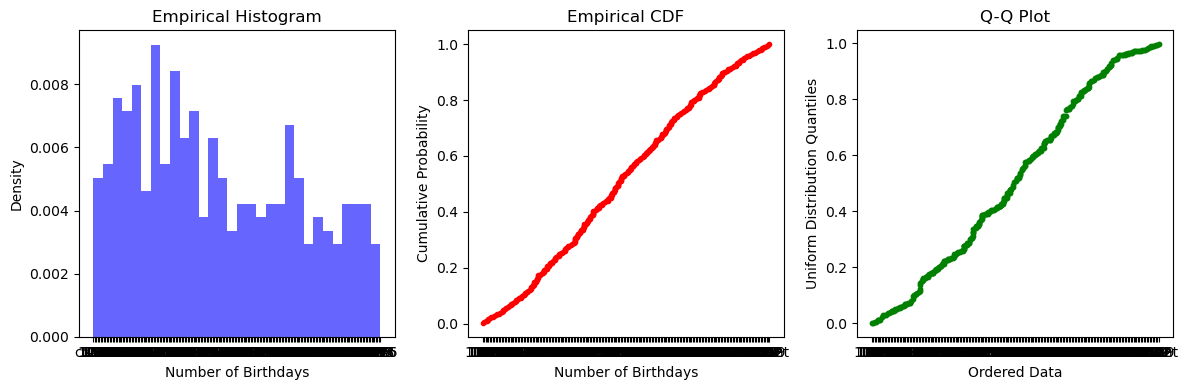

In [22]:
# For loading the data, you can use "df = pd.read_csv('bdaydata.txt',sep=' ')"
# Please note that the txt file needs to be placed in the same folder with the ipynb file.
# To extract the counts column as a vector, use "df.values[:,1]"

df = pd.read_csv('bdaydata.txt', sep=' ', names=['date', 'count'])

data = df.values[:,1]

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(data, bins=30, density=True, alpha=0.6, color='b')
plt.xlabel('Number of Birthdays')
plt.ylabel('Density')
plt.title('Empirical Histogram')

plt.subplot(132)
sorted_data = np.sort(data)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, cdf, marker='.', linestyle='none', color='r')
plt.xlabel('Number of Birthdays')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF')

plt.subplot(133)
uniform = np.random.uniform(0, 1, len(data))
uniform_sorted = np.sort(uniform)
plt.scatter(np.sort(sorted_data), uniform_sorted, s=10, c='g', marker='o')
plt.xlabel('Ordered Data')
plt.ylabel('Uniform Distribution Quantiles')
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

___

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

___

## Ans.


In [19]:
import numpy as np
import pandas as pd
from scipy import stats

df = pd.read_csv('bdaydata.txt', sep=' ', skiprows=1, names=['date', 'count'])
data = df['count']
n = len(data)
uniform_dist = np.random.uniform(0, 1, n)

chi_stat, chi_p = stats.chisquare(data)
print(f"Chi-Square Statistic: {chi_stat}")
print(f"Chi-Square p-value: {chi_p}")

ks_stat, ks_p = stats.kstest(data, 'uniform')
#The CDF from testing
print(f"K-S Statistic: {ks_stat}")
print(f"K-S p-value: {ks_p}")


Chi-Square Statistic: 1352.7233599950073
Chi-Square p-value: 1.2489373800065057e-113
K-S Statistic: 1.0
K-S p-value: 0.0


___

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

___

## Ans.


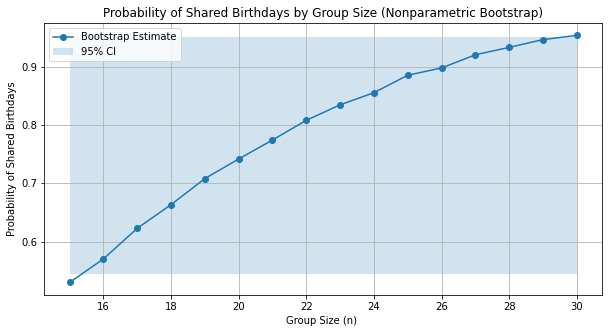

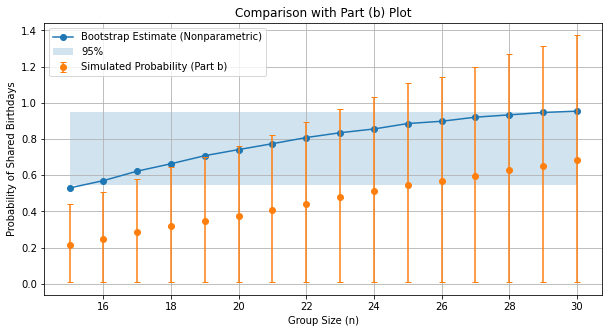

In [54]:
counts=data
# Number of bootstrap samples
num_bootstrap_samples = 10000

# Range of group sizes (n) you want to analyze
n_values = range (15, 31)

# Store the estimated probabilities for each n
probabilities = []

# Perform bootstrap resampling and estimation for each n
for n in n_values:
    shared_birthday_count = 0 # Initialize count for shared birthdays
    for _ in range (num_bootstrap_samples):
        # Generate a bootstrap sample of size n
        bootstrap_sample = np. random. choice (counts, size=n, replace=True)

        # Check if at least one shared birthday
        if len (bootstrap_sample) != len (np. unique (bootstrap_sample)) :
            shared_birthday_count += 1
    
    # Calculate the probability
    probability = shared_birthday_count / num_bootstrap_samples
    probabilities.append (probability)

# Calculate 95% confidence intervals for each n
conf_int_lower = [np.percentile (probabilities, 2.5) for _ in n_values]
conf_int_upper = [np.percentile (probabilities, 97.5) for _ in n_values]

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(n_values, probabilities, marker='o', label='Bootstrap Estimate') 
plt.fill_between (n_values, conf_int_lower, conf_int_upper, alpha=0.2, label='95% CI') 
plt.xlabel('Group Size (n) ')
plt.ylabel('Probability of Shared Birthdays')
plt.title('Probability of Shared Birthdays by Group Size (Nonparametric Bootstrap)') 
plt.legend()
plt.grid(True)

# Compare to the previous plot (part b)
plt.figure(figsize= (10, 5))
plt.plot (n_values, probabilities, marker='o', label= 'Bootstrap Estimate (Nonparametric)')
plt.errorbar(plotted_n_values, simulation_results, yerr=np.transpose(np.array(confidence_intervals)), label='Simulated Probability (Part b)', marker='o', linestyle='None', capsize=3)
plt. fill_between (n_values, conf_int_lower, conf_int_upper, alpha=0.2, label='95%') 
plt.xlabel('Group Size (n)') 
plt.ylabel('Probability of Shared Birthdays') 
plt.title('Comparison with Part (b) Plot') 
plt.legend() 
plt.grid (True)
plt.show()


___
___

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



___

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials.
___


## Ans.

In [ ]:
#from scipy.misc import factorial
#fact_series = factorial(np.arange(n),exact=True)
#first_digit = np.zeros(n)
#for i in range(n):
# first_digit[i] = int(str(fact_series[i])[0])

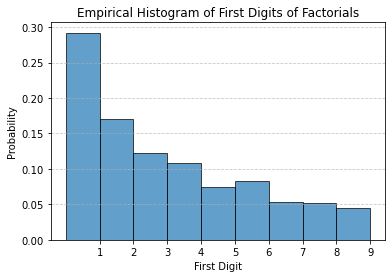

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

n = 1500

fact_series = factorial(np.arange(n),exact=True)
first_digit = np.zeros(n)
for i in range(n):
    first_digit[i] = int(str(fact_series[i])[0])

# Calculate the empirical histogram
hist, bins = np.histogram(first_digit, bins=np.arange(1, 11) - 0.5, density=True)

# Plot the empirical histogram
plt.bar(bins[:-1], hist, width=1, alpha=0.7, edgecolor='black')
plt.xlabel('First Digit')
plt.ylabel('Probability')
plt.title('Empirical Histogram of First Digits of Factorials')
plt.xticks(range(1, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

___
**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

___


## Ans.

From a), we plotted with 9 bins. Let the # of bins is k.
Let S be the # of paramenters needed to be estimated. (In this case S=0)
From a, we know the frequency of each bin = observed frequency.
Expected frequency which is the frequency of the data that we expect to see for the distribution that we want to see. So in this case because we are working with the uniform so in this case:
frequency = #data/#bins



In [6]:
"""""observations=first_digit
expected_frequency=1500/9
#USE np.bincount to find observed freq
stats.chisquare(first_digit,expected_frequency,ddof=0)
This function will return two things, test statistic and p-value, we just look at the p-value in this case. 
If too small we reject the null Hypothesis, H_0=Data set has Uniform"""


'""observations=first_digit\nexpected_frequency=1500/9\n#USE np.bincount to find observed freq\nstats.chisquare(first_digit,expected_frequency,ddof=0)\nThis function will return two things, test statistic and p-value, we just look at the p-value in this case. \nIf too small we reject the null Hypothesis, H_0=Data set has Uniform'

In [10]:
from scipy.stats import chisquare

# Observed frequencies from the empirical histogram
observed_frequencies = hist * n

# Expected frequencies assuming a uniform distribution
expected_frequency = n / 9

# Perform Chi-square goodness-of-fit test
chi2, p = chisquare(observed_frequencies, f_exp=expected_frequency)

# Output the test statistics and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p)

# Determine the result of the Chi-square test
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: The data does not follow a uniform distribution.")
else:
    print("Fail to reject the null hypothesis: The data follows a uniform distribution.")

Chi-square statistic: 670.8000000000002
p-value: 1.3805718582880795e-139
Reject the null hypothesis: The data does not follow a uniform distribution.


___

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


___

In [12]:
import math
from scipy.stats import chisquare

def BenfordsLaw(d): 
    # Compute log10(d+1) - log10(d)
    result = math.log10(d + 1) - math.log10(d)
    return result

# Expected frequencies assuming a uniform distribution
expected_frequency = []

# Ensure the length of expected_frequency matches the length of observed_frequencies
for i in range(1, 10):
    expected_frequency.append(BenfordsLaw(i) * sum(observed_frequencies))

# Perform Chi-square goodness-of-fit test
chi2, p = chisquare(observed_frequencies, expected_frequency)

# Output the test statistics and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p)

# Determine the result of the Chi-square test
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: The data does not follow Benford's Law.")
else:
    print("Fail to reject the null hypothesis: The data follows Benford's Law.") 

Chi-square statistic: 9.456569118464644
p-value: 0.30525483396067576
Fail to reject the null hypothesis: The data follows Benford's Law.


___

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.
___

## Ans.

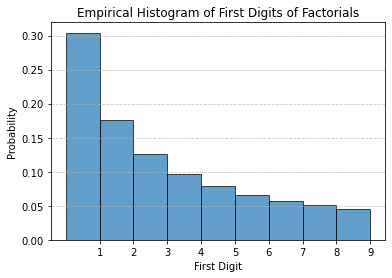

In [13]:
import pandas as pd

# Read the dataset
data = pd.read_csv('us_pop.csv')

# Extract leading digits
leading_digits = data['population'].astype(str).str[0].astype(int)

# Compute the empirical histogram
hist, bins = np.histogram(leading_digits, bins=np.arange(1, 11) - 0.5, density=True)

# Plot the empirical histogram
plt.bar(bins[:-1], hist, width=1, alpha=0.7, edgecolor='black')
plt.xlabel('First Digit')
plt.ylabel('Probability')
plt.title('Empirical Histogram of First Digits of Factorials')
plt.xticks(range(1, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Observed frequencies from the empirical histogram
observed_frequencies = hist * len(leading_digits)  # Assuming len(leading_digits) is the total number of observations

# Expected frequencies assuming a uniform distribution
expected_frequency = len(leading_digits) / 9

# Perform Chi-square goodness-of-fit test
chi2, p = chisquare(observed_frequencies, f_exp=expected_frequency)

# Output the test statistics and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p)

# Determine the result of the Chi-square test
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: The data does not follow a uniform distribution.")
else:
    print("Fail to reject the null hypothesis: The data follows a uniform distribution.")

Chi-square statistic: 50323.53572
p-value: 0.0
Reject the null hypothesis: The data does not follow a uniform distribution.


In [15]:
# Expected frequencies assuming a uniform distribution
expected_frequency = []

# Ensure the length of expected_frequency matches the length of observed_frequencies
for i in range(1, 10):
    expected_frequency.append(BenfordsLaw(i) * sum(observed_frequencies))

# Perform Chi-square goodness-of-fit test
chi2, p = chisquare(observed_frequencies, expected_frequency)

# Output the test statistics and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p)

# Determine the result of the Chi-square test
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: The data does not follow Benford's Law.")
else:
    print("Fail to reject the null hypothesis: The data follows Benford's Law.") 

Chi-square statistic: 11.843226818110919
p-value: 0.15833698137849542
Fail to reject the null hypothesis: The data follows Benford's Law.


**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.